# Ejercicio 2: Clasificación de Diabetes con Modelos Supervisados
### Contexto
En esta tarea trabajaremos con el dataset Pima Indians Diabetes (disponible en Kaggle: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database), que contiene datos médicos para predecir si un paciente tiene diabetes (variable objetivo binaria).
El objetivo es construir, evaluar y_2 comparar varios modelos supervisados para clasificación, aplicando preprocesamiento, validación y_2 análisis crítico de resultados, además de entender cómo explicar sus predicciones.

### Parte 1: Exploración y Preprocesamiento
1. Carga el dataset y realiza una exploración inicial:


    * Revisa las primeras filas (head()) y estadísticas básicas (describe()).
    * ¿Cómo se distribuyen los valores de cada columna?
    * ¿Hay valores faltantes o datos anómalos?


In [1]:
# Importar librerías
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Cargar datos desde CSV
diabetes = pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### FILAS
La columna de insulin tiene valores de ceros, por lo que nos indica que hay valores faltantes (incluso en pacientes sin insulina se pueden detectar niveles de insulina), lo mismo ocurre para SkinThickness, BMI, BloodPressure, Glucose.

In [3]:
# FILAS #
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Estadísticas descriptivas

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Datos del dataframe
* **Pregnancies:** Numero de veces que el paciente estuvo embarazada.
  Van desde 0 hasta un maximo de 17 embarazos, con una media de 3~4 embarazos presentes en una cantidad de 768 individuos.

* **Glucose:** Concentracion de glucosa en el plasma presente medida a 2 horas despues de realizar una prueba oral del de toleracia a la glucosa.
  Se puede ver que existe un minimo de 0 (es incorrecto debido a que no pueden haber una medida menor o igual a 0) con un maximo de 199, donde principalmente los valores presentes son de 120

* **BloodPressure:** Presion arterial diastolica del paciente (mm Hg).
  La presion que se encuentra aqui muestra que hay un error, debido a que se muestra una presion de 0 en algunos casos, cosa que es incorrecta, pero ignorando esto, se puede notar una presion arterial considerablemente buena.

* **SkinThickness:** Espesor del pliegue cutaneo del triceps(mm).
    Esta variable mide, en milímetros, el grosor de la grasa subcutánea en la parte posterior del brazo (tríceps) usando un calibrador especial. Es un indicador de la cantidad de grasa corporal del paciente.

* **Insulin:** Insulina serica medida a las 2 horas (mu U/ml).
  Consentracion de laa insulina despues de una prueba donde muestra como responde el cuerpo a la glucosa y la funcion pancreatica.

* **BMI:** Indice de masa corporal.
  Medida que estima la cantidad de grasa corporal y clasifica el estado nutricional del paciente.

* **DiabetesPedigreeFunction:** Función de pedigrí de diabetes.
  Representa la probabilidad genética de desarrollar diabetes, calculada a partir del historial familiar del paciente (por ejemplo, si padres o hermanos han tenido diabetes). Un valor más alto indica mayor predisposición hereditaria a la enfermedad.

* **Age:** Edad.
  Edad del paciente al cual se le esta estudiando la posibilidad de que tenga diabetes o no. Con edades principalmente de 33 años.

* **Outcome:** Estado de la enfermedad dentro del paciente(0 no tiene/1 tiene diabetes)
  Valor del cual se puede confirmar que un paciente posee esta enfermedad o no la posee.
  

2. Aplica las transformaciones necesarias:


    * Limpieza de datos (imputación o eliminación de valores faltantes).    
    * Escalado de características numéricas (StandardScaler, MinMaxScaler, etc.). 
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
    
    * Codificación si hubiera variables categóricas (en este caso no hay, pero verificar).

In [5]:
diabetes_filtrado = diabetes[(diabetes['Insulin'] != 0) & (diabetes['SkinThickness'] != 0) 
& (diabetes['Glucose'] != 0) & (diabetes['BloodPressure'] != 0) & (diabetes['BMI'] != 0)]
diabetes_filtrado

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

diabetesE = StandardScaler().fit_transform(diabetes_filtrado) # Regresión logistica
diabetes2 = MinMaxScaler().fit_transform(diabetes_filtrado) # para K-vecinos más cercanos (KNN)
# Arbol de decisión -> no necesita escalado

diabetesE_1 = pd.DataFrame(diabetesE, columns=diabetes_filtrado.columns)
diabetes_2 = pd.DataFrame(diabetes2, columns=diabetes_filtrado.columns)

### Parte 2: División de datos
Divide el dataset en tres conjuntos:


* Entrenamiento (60%)


* Validación (20%)


* Test (20%) -> Para evaluar el modelo entrenado (evaluar si hay sobreajuste o no, etc)


In [7]:
from sklearn.model_selection import train_test_split



""" Regresion Logistica """
X_E = diabetesE_1.drop(columns=['Outcome']).astype(int)
y_E = diabetesE_1['Outcome'].astype(int)
X_E_train, X_E_test, y_E_train, y_E_test = train_test_split(X_E, y_E, test_size=0.2, random_state=42)
X_E_train, X_E_val, y_E_train, y_E_val = train_test_split(X_E_train, y_E_train, test_size=0.25, random_state=42)

""" Arbol de decisiones """
X = diabetes_filtrado.drop(columns=['Outcome'])
y = diabetes_filtrado['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

""" KNN """
X_2 = diabetes_2.drop(columns=['Outcome'])
y_2 = diabetes_2['Outcome']
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_2_train, X_2_val, y_2_train, y_2_val = train_test_split(X_2_train, y_2_train, test_size=0.25, random_state=42)


### Parte 3: Modelos de clasificación
Entrena los siguientes modelos con el conjunto de entrenamiento, usando la validación para ajustar hiperparámetros básicos si quieres:

**1. Regresión logística**


**2. Árbol de decisión** (con profundidad máxima limitada para evitar overfitting)


**3. K-vecinos más cercanos** (KNN) (elige un valor k razonable)
    Explica cómo funciona el algoritmo KNN:
     - ¿Qué aprende el algoritmo KNN? 


<h4>Regresión logística</h4>

In [8]:
#Regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [9]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_E_train, y_E_train)

print("Mejor C:", grid.best_params_['C'])
print("Mejor penalty:", grid.best_params_['penalty'])

Mejor C: 1
Mejor penalty: l2


In [26]:
modelo_rl = LogisticRegression(C=1,penalty='l2').fit(X_E_train, y_E_train)

print(modelo_rl.score(X_E_test, y_E_test))

0.7468354430379747


In [32]:
print("coeficientes:")
for nombre, coef in zip(X_E_train.columns, modelo_rl.coef_[0]):  # Accediendo al primer elemento de la matriz
    print(f"{nombre}: {coef:.4f}")

coeficientes:
Pregnancies: 0.7115
Glucose: 1.7621
BloodPressure: 0.0801
SkinThickness: 0.4679
Insulin: -0.0553
BMI: 0.5144
DiabetesPedigreeFunction: 0.5951
Age: 0.3963


---------------------------------------------------------------------------------------


<h4>Árbol de decisión</h4> 

1. Selección de la profundidad del árbol

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for depth in range(1, 21):  # Profundidades de 1 a 20
    # Creamos un arbol con la profundidad depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # cross_val_score divide los datos de entrenamiento en 5 subconjuntos (cv=5).
    # El modelo se entrena en 4 partes y se prueba en la quinta, repitiendo el proceso 5 veces.
    # Se obtiene la precisión (accuracy) en cada iteración y luego se promedia.
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy') # (Es un array)
    print(f"Profundidad {depth}: Accuracy promedio = {scores.mean():.4f}")

Profundidad 1: Accuracy promedio = 0.7437
Profundidad 2: Accuracy promedio = 0.7095
Profundidad 3: Accuracy promedio = 0.7264
Profundidad 4: Accuracy promedio = 0.7135
Profundidad 5: Accuracy promedio = 0.7008
Profundidad 6: Accuracy promedio = 0.6752
Profundidad 7: Accuracy promedio = 0.6665
Profundidad 8: Accuracy promedio = 0.6453
Profundidad 9: Accuracy promedio = 0.6327
Profundidad 10: Accuracy promedio = 0.6326
Profundidad 11: Accuracy promedio = 0.6412
Profundidad 12: Accuracy promedio = 0.6499
Profundidad 13: Accuracy promedio = 0.6455
Profundidad 14: Accuracy promedio = 0.6455
Profundidad 15: Accuracy promedio = 0.6455
Profundidad 16: Accuracy promedio = 0.6455
Profundidad 17: Accuracy promedio = 0.6455
Profundidad 18: Accuracy promedio = 0.6455
Profundidad 19: Accuracy promedio = 0.6455
Profundidad 20: Accuracy promedio = 0.6455


Para evitar un sobreajuste (con una profundidad muy alta) y tampoco perder información importante por la complejidad del dataset (con una profundidad muy baja), se trabajará con una profundidad de 4, así intentar buscar un equilibrio.

2. Creación del Árbol

In [12]:
# Árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Crear un modelo de árbol de decisión
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_val)


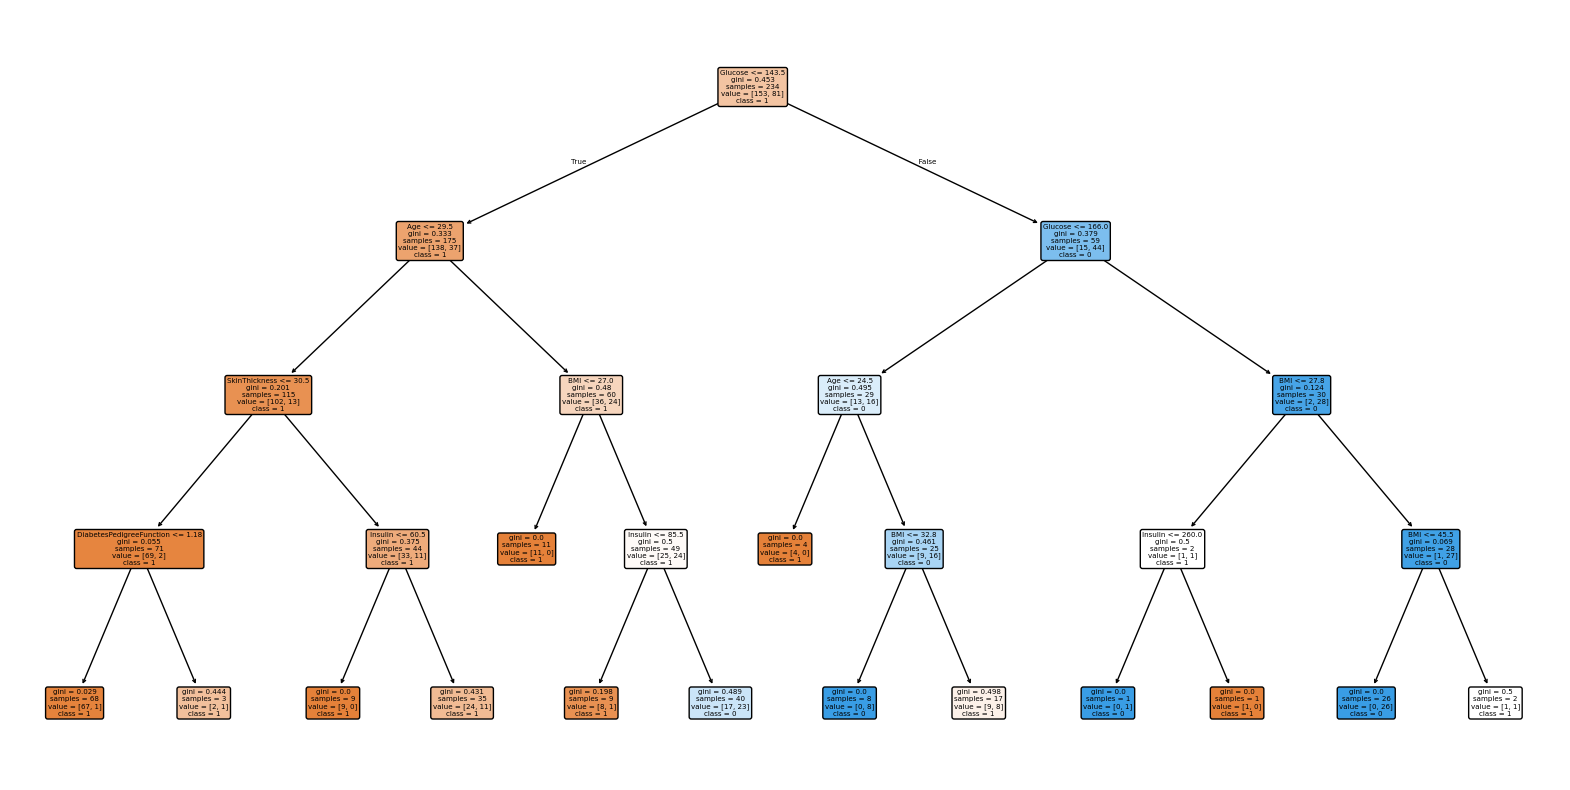

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convertir diabetes.target_names a lista

class_names = [str(c) for c in diabetes['Outcome'].unique()]


# Visualizar el árbol
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=diabetes.columns[:-1], class_names=class_names, rounded=True)

plt.show() 

---------------------------------------------------------------
<h4>KNN</h4>

**¿Qué es KNN (K-vecinos más cercanos)?**

Es un algoritmo de clasificación y regresión que decide la categoría de un nuevo dato basándose en sus k vecinos más cercanos.
Los "vecinos" son los puntos de datos más cercanos al nuevo dato que queremos clasificar.

**Cómo funciona el algoritmo KNN**
1) `Se define un número k de vecinos` (Teniendo en cuenta de que un K muy alto podría producir varianza baja, complejidad baja y sesgo alto, mientras que un K muy bajo producir predicciones inestables). Lo ideal es encontrar un valor K que equilibre entre varianza alta (sobreajuste) y sesgo alto (subajuste).
   
2) `Se calcula la distancia entre el nuevo dato, y todos los puntos en el conjunto de entrenamiento`. La distancia puede ser euclidiana, Manhattan, Minkowski o de Hamming.

   
3) `Se seleccionan los k puntos más cercanos.`

   
4) * `Clasificación:` Se asigna la clase más frecuente entre los vecinos.

   * `Regresión:`  Se usa el promedio de los valores de los vecinos.

**¿Qué aprende el algoritmo KNN?**

A comparación de los anteriores modelos, este se alimenta con sets de datos de entrenamiento que MEMORIZA, para posteriormente buscar los k vecinos más cercanos y en base a ellos realizar la clasificación o regresión.

In [14]:
from sklearn.neighbors import KNeighborsRegressor
# Crear modelo KNN para regresión con k=3 vecinos
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for k in range(1, 21):  # Profundidades de 1 a 20
    # Creamos un arbol con la profundidad depth
    knn = KNeighborsClassifier(n_neighbors=k)

    # cross_val_score divide los datos de entrenamiento en 5 subconjuntos (cv=5).
    # El modelo se entrena en 4 partes y se prueba en la quinta, repitiendo el proceso 5 veces.
    # Se obtiene la precisión (accuracy) en cada iteración y luego se promedia.
    scores = cross_val_score(knn, X_2_train, y_2_train, cv=5, scoring='accuracy') # (Es un array)
    print(f"K = {k}: Accuracy promedio = {scores.mean():.4f}")

K = 1: Accuracy promedio = 0.7009
K = 2: Accuracy promedio = 0.7096
K = 3: Accuracy promedio = 0.7265
K = 4: Accuracy promedio = 0.7180
K = 5: Accuracy promedio = 0.7093
K = 6: Accuracy promedio = 0.7351
K = 7: Accuracy promedio = 0.7265
K = 8: Accuracy promedio = 0.7307
K = 9: Accuracy promedio = 0.7607
K = 10: Accuracy promedio = 0.7564
K = 11: Accuracy promedio = 0.7521
K = 12: Accuracy promedio = 0.7436
K = 13: Accuracy promedio = 0.7477
K = 14: Accuracy promedio = 0.7520
K = 15: Accuracy promedio = 0.7734
K = 16: Accuracy promedio = 0.7563
K = 17: Accuracy promedio = 0.7734
K = 18: Accuracy promedio = 0.7605
K = 19: Accuracy promedio = 0.7777
K = 20: Accuracy promedio = 0.7648


In [16]:
# Crear modelo KNN para regresión con k vecinos
knn = KNeighborsClassifier(n_neighbors=15, metric='manhattan')

# Entrenamos el modelo con datos de entrenamiento
knn.fit(X_2_train, y_2_train)

# Predecir si alguien si tiene diabetes
y_2_pred = knn.predict(X_2_test)
print("Predicción:", y_2_pred)

Predicción: [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 1.]


-------------------------
### Parte 4: Evaluación
Evalúa cada modelo con el conjunto de test usando las métricas:
Accuracy


Precision


Recall


F1-score


Matriz de confusión


Compara y comenta las diferencias entre los modelos.


<h4>Regresión logística</h4>

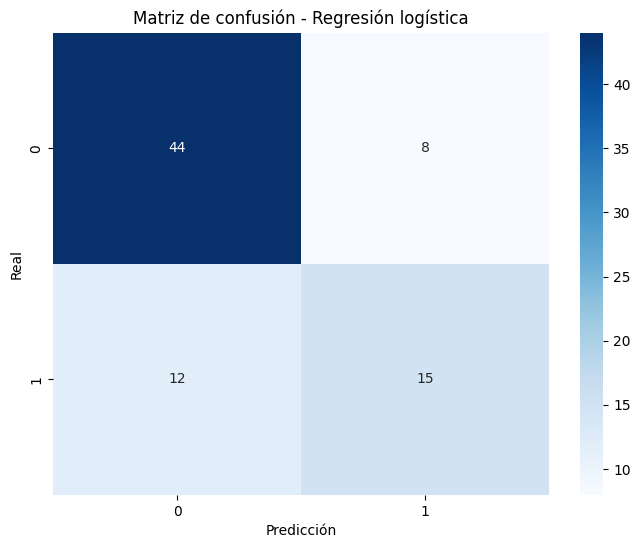

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        52
           1       0.65      0.56      0.60        27

    accuracy                           0.75        79
   macro avg       0.72      0.70      0.71        79
weighted avg       0.74      0.75      0.74        79



In [17]:
# INGRESE AKI LA EVALUACIÓN :3 Tenkiu Bau bau
# matriz de confusion

y_E_pred = modelo_rl.predict(X_E_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_E_test, y_E_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión - Regresión logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# metricas de precisión y recall
labels = sorted(set(y_E_test) | set(y_E_pred)) 
labels_str = [str(label) for label in labels] # la función classification_report espera etiquetas str, no int

report = classification_report(y_E_test, y_E_pred, target_names=labels_str)
print(report)

**RESULTADOS**
Los resultados que pueden ser vistos dentro de la matriz de confusion del modelo de Regresion logistica podemos ver que el modelo predijo:
- De manera correcta que 44 pacientes no tenian diabetes.
- De manera incorrecta que 8 pacientes tenian diabetes, aunque realmente no lo tenian.
- De manera incorrecta que 12 pacientes no tenian diabetes, cuando realmente este era el caso.
- De manera correcta que 15 pacientes tenian diabetes.

**Precision:**
El modelo muestra una precision del 79% sobre los no diabeticos, por lo que implica que el modelo predice de mejor manera a la gente que no tiene diabete, mientras que tiene una precision de 65%, lo que implica que es peor encontrando a gente que tiene diabetes, por lo que tiende a equivocarse mas

**ReCall:**
El modelo identifica correctamente a el 85% de los pacientes sin diabetes, solamente equivocandose con un 15% de los pacientes. Mientras que solamente detecta correctamente que un 56% tiene diabetes, dejando mal diagnosticado a un 44% de estos pacientes

**F1-Score:**
Como se a mencionado con los otros datos, el modelo es mas propenso a asegurarse de que un paciente no tenga diabetes, en nuestro caso podemos ver que este valor es mas alto que el de los que tienen diabetes cosa que produce que sea unicamente eficiente sobre pacientes sin diabetes antes de los que tienen diabetes.

-------------------

<h4>Árbol de decisión</h4>

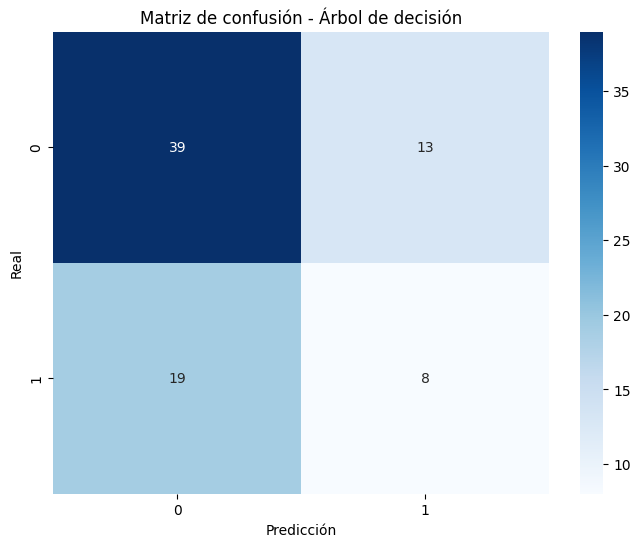

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        52
           1       0.38      0.30      0.33        27

    accuracy                           0.59        79
   macro avg       0.53      0.52      0.52        79
weighted avg       0.57      0.59      0.58        79



In [18]:
# matriz de confusion

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión - Árbol de decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# metricas de precisión y recall
labels = sorted(set(y_test) | set(y_pred)) 
labels_str = [str(label) for label in labels] # la función classification_report espera etiquetas str, no int

report = classification_report(y_test, y_pred, target_names=labels_str)
print(report)

**Resultados**

Viendo la matriz de confusión, podemos observar que:

* (39) verdaderos negativos: El modelo predijo correctamente que no tenían diabetes.
* (13) falsos positivos: El modelo predijo que tenían diabetes, pero no era verdad.
* (19) falsos negativos: El modelo predijo que no tenían diabetes, pero si tenían.
* (8) verdaderos positivos: El modelo predijo correctamente que sí tenían diabetes.

**Precision** "De todos los casos que el modelo predijo como positivos, ¿cuántos eran realmente positivos?"

Podemos observar que de todos los casos que predijo como no diabéticos, el 67% correctamente no lo eran, y de los que predijo como diabéticos, el 38% realmente lo era.

**Recall** "De todos los casos que son realmente positivos, ¿cuántos logró identificar el modelo?"

El modelo logró identificar 75% de los verdaderos individuos sin diabetes, y solo un 30% de los verdaderos individuos con diabetes, lo que nos indica que el modelo está identificando con mayor éxito aquellos que no tienen diabetes, pero a los que sí, dificilmente logra acertar.

**F1-Score** (Media armónica de la precisión y el recall)

Para el caso de individuos sin diabetes (0) tenemos que el F1-Score tiene un valor de 0.71, lo cual nos indica que el modelo está detectando bien a aquellos que no tienen diabetes, pero tambien genera algunos falsos negativos, por lo que el modelo podría mejorar. 

Para el caso de individuos con diabetes (1) el F1-Score tiene un valor de 0.33, lo cual tiene sentido ya que la precisión y recall fueron bajos, esto nos indica que el modelo no está detectando bien los casos de diabetes, evidenciado tambien en la matriz de confusión, por lo que `el modelo necesita arreglos ya que parece estar subajustado.`

<h4>KNN</h4>

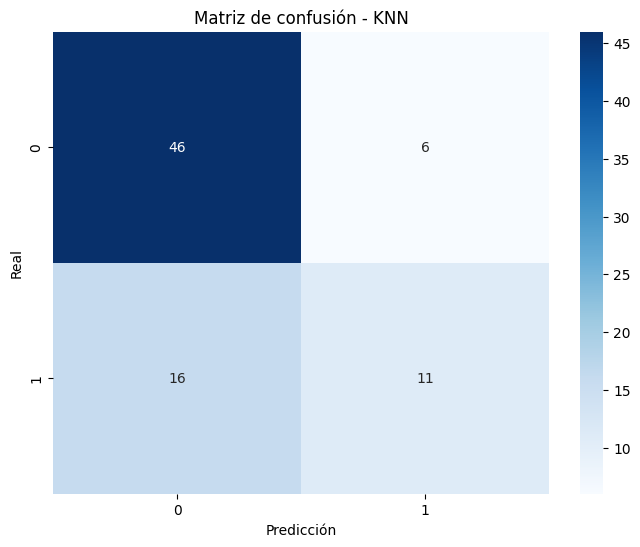

              precision    recall  f1-score   support

         0.0       0.74      0.88      0.81        52
         1.0       0.65      0.41      0.50        27

    accuracy                           0.72        79
   macro avg       0.69      0.65      0.65        79
weighted avg       0.71      0.72      0.70        79



In [19]:
# matriz de confusion

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_2_test, y_2_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión - KNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# metricas de precisión y recall
labels = sorted(set(y_2_test) | set(y_2_pred)) 
labels_str = [str(label) for label in labels] # la función classification_report espera etiquetas str, no int

report = classification_report(y_2_test, y_2_pred, target_names=labels_str)
print(report)

**Resultados**

Viendo la matriz de confusión, podemos observar que:

* (46) verdaderos negativos: El modelo predijo correctamente que no tenían diabetes.
* (6) falsos positivos: El modelo predijo que tenían diabetes, pero no era verdad.
* (16) falsos negativos: El modelo predijo que no tenían diabetes, pero si tenían.
* (11) verdaderos positivos: El modelo predijo correctamente que sí tenían diabetes.

**Precision** "De todos los casos que el modelo predijo como positivos, ¿cuántos eran realmente positivos?"

Podemos observar que de todos los casos que predijo como no diabéticos, el 74% correctamente no lo eran, y de los que predijo como diabéticos, el 65% realmente lo era.

**Recall** "De todos los casos que son realmente positivos, ¿cuántos logró identificar el modelo?"

El modelo logró identificar un 88% que individuos realmente no tenían diabetes, y un 41% que si tenían diabetes, lo cual es bastante bajo, indicando que `al modelo le está costando identificar los individuos con diabetes.`

**F1-Score** (Media armónica de la precisión y el recall)

Para el caso de individuos sin diabetes (0) tenemos que el F1-Score tiene un valor de 0.81, lo cual indica que hay un buen equilibrio entre precisión y recall, es decir, el modelo está prediciendo correctamente los casos en que el individuo no tiene diabetes, y si bien si se equivoca, lo hace en menor medida.

Para el caso de individuos con diabetes (1) el F1-Score tiene un valor de 0.50, lo cual indica que el modelo no está equilibrando bien la precision y recall, este está produciendo "falsas alarmas" y no detectando a todos los individuos con diabetes. 

`El modelo parece estar subajustado, puesto que si bien predice correctamente personas sin diabetes, tiene un desempeño bastante bajo al identificar personas diabeticas.`

<h4>Comparación entre los modelos</h4>

KNN a comparación de el modelo de árbol de decisión, si bien ambos parecen estar subajustados, KNN tiene un mejor rendimiento para detectar personas sin diabetes, teniendo un F1-Score alto para este caso, o sea, un buen equilibrio entre precisión y recall, en cambio, el de árbol de decisión tiene un F1-Score un poco más bajo, indicando que puede mejorar. En el caso de identificar personas con diabetes, ambos modelos tienen problemas mostrando valores de F1-Score bajisimos, por lo que necesitan arreglos para poder predecir correctamente. 

Luego si lo comparamos con el modelo de Regresion logistica, podemos darnos cuenta de que entre los tres, fue el que mejor predijo a los pacientes, teniendo un porcentaje mucho mayor, demostrando que es el mejor prediciendo los valores correctos dentro de los datos, aunque aun considerando que no es perfecto porque principalmente deberia ser eficaz encontrando los pacientes con diabetes.

### Verificando cual podría ser la razón del mal rendimiento de knn y árbol de decisión

In [20]:
import numpy as np
print("Distribución de clases en entrenamiento:")
counts = np.bincount(y_train.astype(int))
print(f"Clase 0 (No diabéticos): {counts[0]}")
print(f"Clase 1 (Diabéticos): {counts[1]}")


Distribución de clases en entrenamiento:
Clase 0 (No diabéticos): 153
Clase 1 (Diabéticos): 81


Podemos observar que hay muchos más "no diabeticos" que aquellos que si lo son, por lo que esto **podría** ser la razón de que los modelos presenten un desequilibrio a la hora de predecir, una opción para arreglarlo podría ser quitar ejemplos del set de entrenamiento, pero esto sería un poco riesgoso ya que estariamos perdiendo información. 

Por ejemplo utilizando RandomUnderSampler, de imblearn, se reduce la cantidad de muestras de la clase mayoritaria (no diabéticos), para que se equilibre con la clase minoritaria (diabéticos).

In [21]:
from imblearn.under_sampling import RandomUnderSampler

# Instanciar el undersampler
rus = RandomUnderSampler(random_state=42)

# Aplicar el undersampling al conjunto de entrenamiento
X_train_re, y_train_re = rus.fit_resample(X_train, y_train)

# Ver la distribución antes y después
print("Antes:", np.bincount(y_train))
print("Después:", np.bincount(y_train_re))

Antes: [153  81]
Después: [81 81]


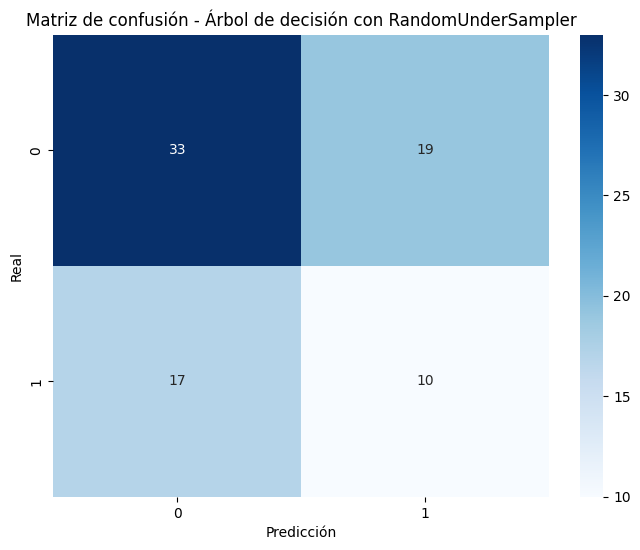

              precision    recall  f1-score   support

           0       0.66      0.63      0.65        52
           1       0.34      0.37      0.36        27

    accuracy                           0.54        79
   macro avg       0.50      0.50      0.50        79
weighted avg       0.55      0.54      0.55        79



In [22]:
# Crear un modelo de árbol de decisión
clf_2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Entrenar el modelo
clf_2.fit(X_train_re, y_train_re)

# Hacer predicciones
y_pred_new = clf_2.predict(X_val)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión - Árbol de decisión con RandomUnderSampler")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# metricas de precisión y recall
labels = sorted(set(y_test) | set(y_pred_new)) 
labels_str = [str(label) for label in labels] # la función classification_report espera etiquetas str, no int

report = classification_report(y_test, y_pred_new, target_names=labels_str)
print(report)

Sin embargo, en este caso, este no tuvo efectos, de hecho, el rendimiento se mantuvo igual o incluso un poco peor, notando que hubo más casos de falsos positivos (16, antes 13).

Otra forma es generando muestras sintéticas basadas en los datos y así, igualar la cantidad de muestras minoritarias con la mayoritaria.

Antes: [153  81]
Después: [153 153]


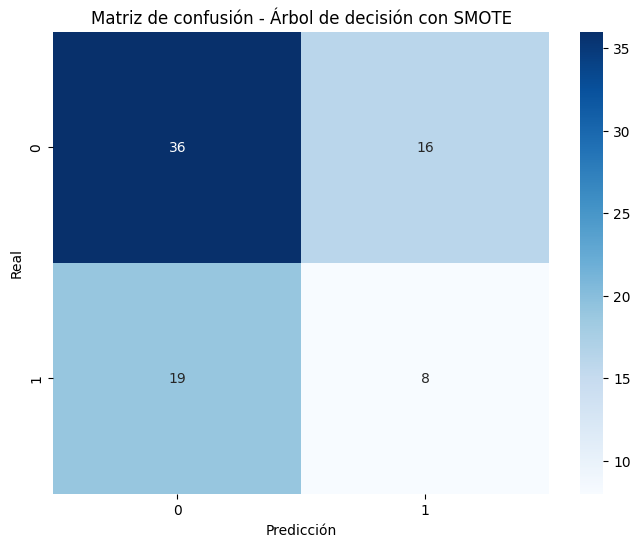

              precision    recall  f1-score   support

           0       0.65      0.69      0.67        52
           1       0.33      0.30      0.31        27

    accuracy                           0.56        79
   macro avg       0.49      0.49      0.49        79
weighted avg       0.54      0.56      0.55        79



In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_re, y_train_re = smote.fit_resample(X_train, y_train)

# Ver la distribución antes y después
print("Antes:", np.bincount(y_train))
print("Después:", np.bincount(y_train_re))

# Crear un modelo de árbol de decisión
clf_3 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Entrenar el modelo con los datos balanceados
clf_3.fit(X_train_re, y_train_re)

# Hacer predicciones
y_pred_new = clf_3.predict(X_val)

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión - Árbol de decisión con SMOTE")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Métricas de evaluación
labels = sorted(set(y_test) | set(y_pred_new))
labels_str = [str(label) for label in labels]
report = classification_report(y_test, y_pred_new, target_names=labels_str)
print(report)


Sin embargo esta obtuvo el mismo resultado que el anterior. Habría que buscar otras formas de ajustar el rendimiento de los modelos, en especial el modelo de Árbol de decisión que muestra un peor rendimiento comparado a los otros dos modelos.

### Preguntas para reflexionar
**¿Qué desafíos enfrentaste en la limpieza y preprocesamiento de los datos? ¿Cómo los resolviste?**

No tuvimos desafíos muy grandes, simplemente encontramos valores de cero en varias columnas los cuales claramente significaba que había valores faltantes (o sea, no tenían sentido), por lo que para solucionarlo decidimos simplemente quitar estas filas/datos con valores extraños/faltantes. Adicionalmente como cada columna se media en una escala diferente, para los modelos que se veían afectados por esto (KNN - Regresión logística).

**¿Cómo afecta el escalado de características a los modelos? ¿Notaste diferencias de desempeño?**

Para mejorar el rendimiento de los modelos estudiados, aplicamos diferentes métodos de escalado: `StandardScaler`, para regresión logística, el cual es sensible a la escala de los datos (al igual que KNN). Y `MinMaxScaler`, el cual funciona ajustando los datos dentro de un rango pero manteniendo la proporcionalidad de los datos, siendo ideal para algoritmos basados en distancia como KNN. 

Ya que las columnas presentaban escalas diferentes, el escalado ayudó a que todas tuvieran escalas comparables, evitando que los valores más grandes influyeran desproporcionadamente en el entrenamiento del modelo.

En cambio, ya que teníamos presente que árboles de decisión no funciona con distancias, decidimos no entregarle un dataset de entrenamiento escalado, por lo mismo de que no se vería afectado por el mismo.

**¿Cuál modelo tuvo mejor desempeño y por qué crees que fue así?**

El modelo con mayor desempeño fue el de `Regresión logística`, teniendo los valores de recall, precisión y F1-score más altos o equilibrados. Esto pudo haber sido a que este modelo presenta mayor estabilidad frente a los valores atípicos que los otros modelos estudiados.

Si bien KNN también mostró un desempeño bueno para detectar casos de pacientes sin diabetes, al igual que árboles de decisión, tuvieron un desempeño pobre para detectar a aquellos que sí lo tenían, quizá por el poco equilibrio de las clases ( 0 - 1) que había en el dataset, caso en el que regresión logística no se vio tan afectado.


**¿Qué muestra la matriz de confusión para cada modelo? ¿Hay algún tipo de error más frecuente?**

Para todos los casos hubo mayor dificultad para detectar casos de "diabetes", que de "no diabetes", especialmente en KNN y árboles de decisión los cuales mostraron `mayor cantidad de falsos negativos`, en cambio regresión logística detecto de mejor manera casos de diabetes, aunque también cometió errores.

**¿Cómo explicarías a un médico qué variables fueron clave para predecir diabetes con cada modelo?**

Para identificar que variables fueron influyentes, en regresión logística revisamos los coeficientes, y nos pudimos dar cuenta que variables como `Glucose`, `Pregnancies` y `DiabetesPedigreeFunction`(aunque este último a un nivel más moderado que los anteriores nombrados) tuvieron los valores más altos. Mientras que en árbol de decisión observamos que los primeros nodos incluian `Glucose`, por lo que esta variable sería de las más clave o influyentes en la predicción de diabetes.

**¿Qué ventajas y limitaciones ves en usar modelos interpretables frente a modelos menos interpretables?**

Modelos interpretables como regresión logística o árboles de decisión tienen la ventaja de ser más fáciles de entender para luego explicar fácilmente las predicciones, en contraste los modelos menos interpretables como por ejemplo modelos ensembles, pueden ser más difíciles de analizar para por ejemplo un médico, pero suelen ofrecer una mayor precisión en sus resultados.

**¿Qué harías para mejorar el desempeño o la interpretación de los modelos?**

Para mejorar el desempeño probaría ahora eliminar outliers, y en vez de haber eliminado directamente las columnas con datos faltantes, reemplazarlos con la mediana, pues esto pudo haber afectado de manera negativa el rendimiento de los modelos y ser la razón del porqué la dificultad para detectar correctamente casos de diabetes.